<a href="https://colab.research.google.com/github/nibinkjoseph/Walmart-sales-prediction/blob/main/Walmart_Nibin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os



import warnings
warnings.filterwarnings("ignore")

In [87]:
sales_data = pd.read_csv("sales_data.csv")
stores_data = pd.read_csv("stores.csv")
features_data = pd.read_csv("features.csv")

In [88]:
#Exploratory Data Analysis (EDA)

In [89]:
sales_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [90]:
features_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [91]:
sales_data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

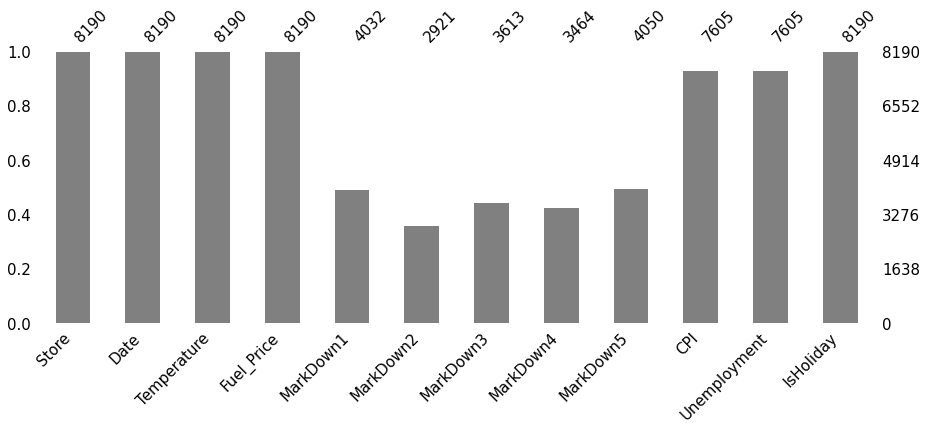

In [149]:
import missingno as msno
msno.bar(features_data,figsize=(15, 5),fontsize=15,color='grey');

In [152]:
print('Percentages of missing values in features dataframe.')
(100*features_data.isna().sum()/features_data.shape[0]).sort_values()

Percentages of missing values in features dataframe.


Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
IsHoliday        0.000000
CPI              7.142857
Unemployment     7.142857
MarkDown5       50.549451
MarkDown1       50.769231
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown2       64.334554
dtype: float64

In [92]:
sales_data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [93]:
sales_data.shape

(421570, 5)

In [94]:
sales_data.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [95]:
sales_data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [96]:
#now we wanna see if this is a systematic issue or random
sales_data_check = sales_data.loc[sales_data['Weekly_Sales'] <= 0]
sales_data_check.shape

(1358, 5)

In [97]:
sales_data_check.nunique()

Store            45
Dept             51
Date            143
Weekly_Sales    679
IsHoliday         2
dtype: int64

In [98]:
sales_data_check.shape[0]/sales_data.shape[0]*100

0.3221291837654482

In [99]:
#Now creating new file with no -ve weekly sales

sales_data2 = sales_data.loc[sales_data['Weekly_Sales']>0]

sales_data2.shape

(420212, 5)

In [100]:
sales_data2.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [101]:
#converting numeric variable to to string as store , dept,and isholiday is categorical

In [102]:
sales_data2['Store'] = sales_data2['Store'].astype(str)
sales_data2['Dept'] = sales_data2['Dept'].astype(str)
sales_data2['IsHoliday'] = sales_data2['IsHoliday']*1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [103]:
sales_data2.dtypes

Store            object
Dept             object
Date             object
Weekly_Sales    float64
IsHoliday         int64
dtype: object

In [104]:
#now we work on features and sales file

In [105]:
#Creating a function that does all of the above tasks in one go
def get_basic_stats(dfname):
    print("Shape of dataframe is " + str(dfname.shape))
    print("Below are datatypes of columns in DF")
    print(dfname.dtypes.sort_values())
    print("Below are missing values in each column")
    print(dfname.isna().sum().sort_values())
    print("Below are the number of unique values taken by a column")
    print(dfname.nunique().sort_values())
    print("Below are some records in DF")
    print(dfname.head())
    print("Basic Stats for numeric variables")
    print(dfname.describe())

In [106]:
get_basic_stats(features_data)

Shape of dataframe is (8190, 12)
Below are datatypes of columns in DF
IsHoliday          bool
Store             int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Date             object
dtype: object
Below are missing values in each column
Store              0
Date               0
Temperature        0
Fuel_Price         0
IsHoliday          0
CPI              585
Unemployment     585
MarkDown5       4140
MarkDown1       4158
MarkDown3       4577
MarkDown4       4726
MarkDown2       5269
dtype: int64
Below are the number of unique values taken by a column
IsHoliday          2
Store             45
Date             182
Unemployment     404
Fuel_Price      1011
CPI             2505
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown1       4023
MarkDown5       4045
Temperature     4178
dtype: int64
Be

In [107]:
features_data['Store'] = features_data['Store'].astype(str)
stores_data['Store'] = stores_data['Store'].astype(str)

In [108]:
features_data2 = features_data.drop(['IsHoliday'],axis =1)

In [109]:
#missing value imputation

features_data2['Unemployment'].fillna(features_data2['Unemployment'].mean(), inplace = True)
features_data2['CPI'].fillna(features_data2['CPI'].mean(), inplace = True)

In [110]:
#fill the markdown with zero

In [111]:
features_data2.fillna(0, inplace= True)

In [112]:
features_data2.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [113]:
#stores

In [114]:
get_basic_stats(stores_data)

Shape of dataframe is (45, 3)
Below are datatypes of columns in DF
Size      int64
Store    object
Type     object
dtype: object
Below are missing values in each column
Store    0
Type     0
Size     0
dtype: int64
Below are the number of unique values taken by a column
Type      3
Size     40
Store    45
dtype: int64
Below are some records in DF
  Store Type    Size
0     1    A  151315
1     2    A  202307
2     3    B   37392
3     4    A  205863
4     5    B   34875
Basic Stats for numeric variables
                Size
count      45.000000
mean   130287.600000
std     63825.271991
min     34875.000000
25%     70713.000000
50%    126512.000000
75%    202307.000000
max    219622.000000


In [115]:
#Merging the datasets,store and date are the primary keys

sales_features_data = pd.merge(sales_data2, features_data2, on = ['Store', 'Date'], how = 'inner')

In [118]:
sales_features_data.shape

(420212, 14)

In [120]:
combined_data = pd.merge(sales_features_data, stores_data, on = 'Store', how ='inner')
combined_data.shape


(420212, 16)

In [154]:
combined_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Date2'],
      dtype='object')

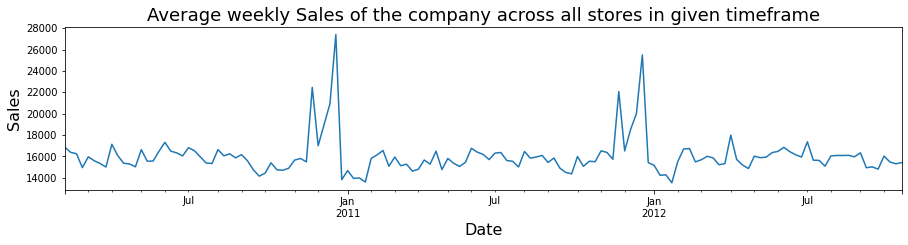

In [155]:
plt.figure(figsize=(15,3))
combined_data.groupby('Date2')['Weekly_Sales'].mean().plot()
plt.title('Average weekly Sales of the company across all stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16);

#Dividing data into train and test

In [128]:
#converting the date format to correct format from object format
combined_data.Date

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
             ...    
420207    2012-10-26
420208    2012-10-26
420209    2012-10-26
420210    2012-10-26
420211    2012-10-26
Name: Date, Length: 420212, dtype: object

In [132]:
combined_data['Date2'] = pd.to_datetime(combined_data['Date'], format = '%Y-%m-%d')

In [133]:
combined_data['Date2']

0        2010-02-05
1        2010-02-05
2        2010-02-05
3        2010-02-05
4        2010-02-05
            ...    
420207   2012-10-26
420208   2012-10-26
420209   2012-10-26
420210   2012-10-26
420211   2012-10-26
Name: Date2, Length: 420212, dtype: datetime64[ns]

In [134]:
combined_data['Date2'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  420212
unique                    143
top       2011-12-23 00:00:00
freq                     3018
first     2010-02-05 00:00:00
last      2012-10-26 00:00:00
Name: Date2, dtype: object

In [135]:
#lets confirm the correct number of weeks

(combined_data['Date2'].max()- combined_data['Date2'].min())/7

Timedelta('142 days 00:00:00')

In [141]:
unique_dates = pd.DataFrame(combined_data['Date2'].unique(), columns = ['date'])
unique_dates.sort_values('date', inplace = True)


splitter = round(unique_dates.shape[0]*0.7,0)
split_date = unique_dates.iloc[int(splitter)-1]['date']
split_date

Timestamp('2011-12-30 00:00:00')

In [142]:
#Using that date to make the split

combined_data_train = combined_data.loc[combined_data['Date2']<= split_date]
combined_data_test = combined_data.loc[combined_data['Date2']> split_date]

combined_data_train.shape[0]/combined_data.shape[0]


0.6977525629920136